In [22]:
import geopandas as gpd
!mkdir -p ../country_bounds && wget -P ../country_bounds https://storage.googleapis.com/fao-maps-catalog-data/boundaries/g2015_2014_0.zip && unzip -o ../country_bounds/g2015_2014_0.zip -d ../country_bounds
gaul = gpd.read_file("../country_bounds/g2015_2014_0.shp")  
gaul.head()

--2025-05-08 22:02:01--  https://storage.googleapis.com/fao-maps-catalog-data/boundaries/g2015_2014_0.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:4004:c17::cf, 2607:f8b0:4004:c08::cf, 2607:f8b0:4004:c19::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:4004:c17::cf|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190192536 (181M) [application/x-zip-compressed]
Saving to: ‘../country_bounds/g2015_2014_0.zip.2’

g2015_2014_0.zip.2  100%[===================>] 181.38M  30.0MB/s    in 6.8s    

2025-05-08 22:02:08 (26.7 MB/s) - ‘../country_bounds/g2015_2014_0.zip.2’ saved [190192536/190192536]

Archive:  ../country_bounds/g2015_2014_0.zip
 extracting: ../country_bounds/g2015_2014_0.cpg  
  inflating: ../country_bounds/g2015_2014_0.dbf  
  inflating: ../country_bounds/g2015_2014_0.prj  
  inflating: ../country_bounds/g2015_2014_0.shp  
  inflating: ../country_bounds/g2015_2014_0.shx  


,STATUS,DISP_AREA,ADM0_CODE,ADM0_NAME,STR0_YEAR,EXP0_YEAR,SHAPE_LENG,SHAPE_AREA,geometry
0,Member State,NO,170,Mozambique,1000,3000,82.563372,67.058939,"MULTIPOLYGON (((32.99153 -25.97012, 32.99189 -..."
1,Member State,NO,160,Mauritius,1000,3000,5.204094,0.173992,"MULTIPOLYGON (((57.33786 -20.47313, 57.33677 -..."
2,Member State,NO,152,Malawi,1000,3000,26.999900,9.905567,"MULTIPOLYGON (((34.7688 -12.09417, 34.72768 -1..."
3,FR Territory,NO,161,Mayotte,1000,3000,2.404745,0.031499,"MULTIPOLYGON (((45.13795 -13.00506, 45.13774 -..."
4,Member State,NO,205,Rwanda,1000,3000,8.127003,2.063852,"POLYGON ((30.47352 -1.05741, 30.47035 -1.05937..."


In [23]:
len(gaul)

277

In [24]:
l = ["Indonesia", 
     "Malaysia", 
     "Philippines", 
     "Singapore", 
     "Thailand", 
     "Cambodia", 
     "Viet Nam",
     "Lao People's Democratic Republic",
     "Myanmar"]
sea = gaul[gaul.ADM0_NAME.isin(l)]
print(sea.ADM0_NAME.unique())

['Myanmar' 'Cambodia' 'Viet Nam' "Lao People's Democratic Republic"
 'Malaysia' 'Thailand' 'Philippines' 'Indonesia' 'Singapore']


<Axes: >

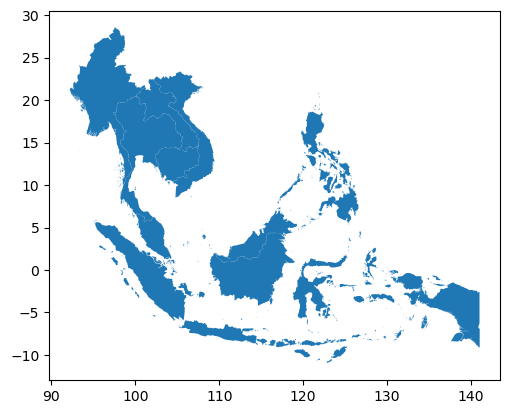

In [25]:
sea.plot()

In [26]:
# read in esa grid fetures
# was downloaded from https://hls.gsfc.nasa.gov/wp-content/uploads/2016/03/S2A_OPER_GIP_TILPAR_MPC__20151209T095117_V20150622T000000_21000101T000000_B00.kml 
# then converted to gpkg ..TODO code for that..
esa = gpd.read_file("../esa_grid/s2_tiling.gpkg") 
esa.head()
print(len(esa))

56686


<Axes: >

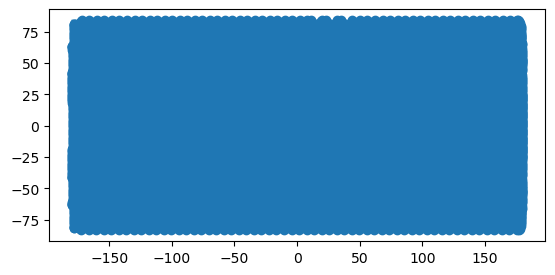

In [27]:
esa.plot()

In [28]:
# intersect esa with sea taking only features in esa that intersect with sea
esa_sea = gpd.sjoin(esa, sea, how="inner", predicate="intersects")
esa_sea.head()

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,...,geometry,index_right,STATUS,DISP_AREA,ADM0_CODE,ADM0_NAME,STR0_YEAR,EXP0_YEAR,SHAPE_LENG,SHAPE_AREA
43139,46NGH,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,NaN,...,GEOMETRYCOLLECTION Z (POLYGON Z ((94.7987 2.71...,159,Member State,NO,116,Indonesia,1000,3000,722.016234,153.794891
43140,46NGJ,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,NaN,...,GEOMETRYCOLLECTION Z (POLYGON Z ((94.80026 3.6...,159,Member State,NO,116,Indonesia,1000,3000,722.016234,153.794891
43141,46NGK,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,NaN,...,GEOMETRYCOLLECTION Z (POLYGON Z ((94.80227 4.5...,159,Member State,NO,116,Indonesia,1000,3000,722.016234,153.794891
43142,46NGL,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,NaN,...,GEOMETRYCOLLECTION Z (POLYGON Z ((94.80473 5.4...,159,Member State,NO,116,Indonesia,1000,3000,722.016234,153.794891
43143,46NGM,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,NaN,...,GEOMETRYCOLLECTION Z (POLYGON Z ((94.80764 6.3...,159,Member State,NO,116,Indonesia,1000,3000,722.016234,153.794891


In [29]:
len(esa_sea)

1138

In [30]:
import shapely
from shapely.geometry import shape, mapping

def flatten_and_2d(geom):
    # Convert 3D to 2D and extract polygons
    if geom.is_empty:
        return None
    if geom.geom_type == 'GeometryCollection':
        # Extract polygons or multipolygons only
        polys = [g for g in geom.geoms if g.geom_type in ['Polygon', 'MultiPolygon']]
        if polys:
            # Merge into MultiPolygon if more than one
            merged = shapely.geometry.MultiPolygon([shapely.geometry.shape(mapping(p).copy()) for p in polys])
            return shapely.force_2d(merged)
        else:
            return None
    # For other types, just force 2D
    return shapely.force_2d(geom)

esa_sea['geometry'] = esa_sea['geometry'].apply(flatten_and_2d)
gdf = esa_sea[esa_sea['geometry'].notnull()]  # Remove empty geometries

In [31]:
gdf.loc[:,"geometry"]

43139    MULTIPOLYGON (((94.7987 2.71283, 95.78573 2.71...
43140    MULTIPOLYGON (((94.80026 3.61726, 95.78815 3.6...
43141    MULTIPOLYGON (((94.80227 4.52168, 95.79126 4.5...
43142    MULTIPOLYGON (((94.80473 5.42553, 95.79506 5.4...
43143    MULTIPOLYGON (((94.80764 6.3299, 95.79958 6.32...
                               ...                        
50618    MULTIPOLYGON (((140.99982 -1.80928, 141.987 -1...
50621    MULTIPOLYGON (((140.99982 -7.23728, 141.99438 ...
50622    MULTIPOLYGON (((140.99982 -6.3325, 141.99253 -...
50623    MULTIPOLYGON (((140.99982 -5.42823, 141.99093 ...
50624    MULTIPOLYGON (((140.99982 -4.52338, 141.98958 ...
Name: geometry, Length: 1138, dtype: geometry

In [32]:
gdf.to_parquet("../esa_grid/esa_tiles_sea.parquet")

In [33]:
len(esa_sea)

1138

In [34]:
len(esa)

56686

<Axes: >

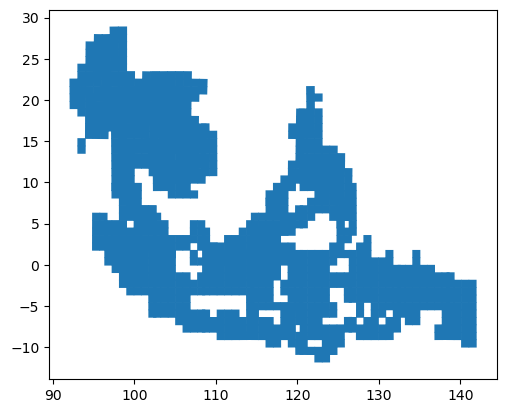

In [35]:
esa_sea.plot()

In [36]:
esa_sea.Name.unique()

array(['46NGH', '46NGJ', '46NGK', ..., '54MWT', '54MWU', '54MWV'],
      shape=(1009,), dtype=object)

In [37]:
adm0_name_to_names = esa_sea.groupby('ADM0_NAME')['Name'].apply(list).to_dict()
print(adm0_name_to_names)

{'Cambodia': ['47PRP', '47PRQ', '47PRR', '48PTA', '48PTR', '48PTS', '48PTT', '48PTU', '48PTV', '48PUA', '48PUB', '48PUS', '48PUT', '48PUU', '48PUV', '48PVA', '48PVB', '48PVS', '48PVT', '48PVU', '48PVV', '48PWA', '48PWS', '48PWT', '48PWU', '48PWV', '48PXA', '48PXB', '48PXS', '48PXT', '48PXU', '48PXV', '48PYA', '48PYB', '48PYU', '48PYV'], 'Indonesia': ['46NGH', '46NGJ', '46NGK', '46NGL', '46NGM', '46NHH', '46NHJ', '46NHK', '46NHL', '46NHM', '47MLV', '47MMT', '47MMU', '47MMV', '47MNS', '47MNT', '47MNU', '47MNV', '47MPS', '47MPT', '47MPU', '47MPV', '47MQS', '47MQT', '47MQU', '47MQV', '47MRP', '47MRQ', '47MRR', '47MRS', '47MRT', '47MRU', '47MRV', '47NKA', '47NKB', '47NKC', '47NKD', '47NKE', '47NKF', '47NLA', '47NLB', '47NLC', '47NLD', '47NLE', '47NLF', '47NMA', '47NMB', '47NMC', '47NMD', '47NME', '47NMF', '47NNA', '47NNB', '47NNC', '47NND', '47NNE', '47NPA', '47NPB', '47NPC', '47NPD', '47NQA', '47NQB', '47NQC', '47NRA', '47NRB', '47NRC', '48MTA', '48MTB', '48MTC', '48MTD', '48MTE', '48MTU',

In [38]:
from pprint import pprint
pprint(adm0_name_to_names)

{'Cambodia': ['47PRP',
              '47PRQ',
              '47PRR',
              '48PTA',
              '48PTR',
              '48PTS',
              '48PTT',
              '48PTU',
              '48PTV',
              '48PUA',
              '48PUB',
              '48PUS',
              '48PUT',
              '48PUU',
              '48PUV',
              '48PVA',
              '48PVB',
              '48PVS',
              '48PVT',
              '48PVU',
              '48PVV',
              '48PWA',
              '48PWS',
              '48PWT',
              '48PWU',
              '48PWV',
              '48PXA',
              '48PXB',
              '48PXS',
              '48PXT',
              '48PXU',
              '48PXV',
              '48PYA',
              '48PYB',
              '48PYU',
              '48PYV'],
 'Indonesia': ['46NGH',
               '46NGJ',
               '46NGK',
               '46NGL',
               '46NGM',
               '46NHH',
               '46NHJ',
   

In [ ]:
# write this to json
import json
with open("../esa_grid/adm0_tiles_by_country_SEA.json", "w") as f:
    json.dump(adm0_name_to_names, f, indent=4)